In [1]:
import time
start_time=time.time()

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import interpolate
import pickle
import json

import strucfunc
from strucfunc import sosflog
from bfunc import bfunc00,bfunc01,bfunc02,bfunc03s

In [3]:
reg = 'M8'
line = 'M8'

In [4]:
pickle_in = open('VFL//' + reg + '.pkl',"rb")
VF = pickle.load(pickle_in)
data = VF[line]

In [5]:
data.RV.var()

7.526433868794324

In [6]:
sig = data.RV.std()
sig2 = data.RV.var()

In [7]:
table = sosflog(data,0.2,3600)

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [8]:
table

s                                                                  \
        count         mean         std          min          25%          50%   
ils                                                                             
0       251.0    10.900326    3.780920     0.791245     7.932465    11.499163   
1       372.0    21.036168    2.709417    15.893827    18.645387    21.451589   
2       954.0    33.044031    4.129478    25.145463    29.597278    33.058073   
3      2469.0    52.140708    6.767782    39.843353    46.401618    52.730634   
4      6069.0    82.815377   10.542408    63.128150    73.957440    83.379843   
5     14422.0   130.937223   16.722401   100.000364   116.907110   131.842998   
6     33006.0   207.648275   26.609104   158.493231   185.118746   209.256884   
7     72993.0   328.219949   42.064053   251.190298   292.310211   330.168289   
8    143599.0   516.705886   67.001673   398.107397   459.233767   517.965328   
9    213357.0   804.645033  105.236700   630.958333   713.264281   799.188144   
10   158344.0  1233.145184  161.084783  1000.002065  1093.806425  1207.869628   
11    42922.0  1865.946544  225.094506  1584.899151  1681.144504  1808.231658   
12     2008.0  2732.149358  190.342629  2511.934924  2585.732612  2685.650704   

                                    dV2                                \
             75%          max     count       mean        std     min   
ils                                                                     
0      14.232803    15.763344     251.0   0.601129   1.307489  0.0000   
1      23.524652    25.085167     372.0   1.325784   4.398866  0.0000   
2      36.496511    39.806962     954.0   1.885351   4.024439  0.0000   
3      58.040298    63.080177    2469.0   2.646000   6.213189  0.0000   
4      91.787362    99.995020    6069.0   4.044545   8.023574  0.0000   
5     145.537977   158.486994   14422.0   5.877549   9.513252  0.0000   
6     230.876785   251.186637   33006.0   8.908933  12.589666  0.0000   
7     364.721673   398.106131   72993.0  13.124847  17.006279  0.0000   
8     574.930511   630.954522  143599.0  13.294752  16.981211  0.0000   
9     893.373994   999.997441  213357.0  12.707682  16.134553  0.0000   
10   1356.315470  1584.889519  158344.0  18.953906  24.756854  0.0000   
11   2004.255411  2511.856992   42922.0  30.512920  34.469109  0.0000   
12   2822.325706  3486.292858    2008.0  48.711793  33.331994  0.0004   

                                            
         25%      50%        75%       max  
ils                                         
0     0.0400   0.1849   0.532900    9.9856  
1     0.0676   0.3025   0.869575   62.7264  
2     0.0841   0.4900   1.690000   53.7289  
3     0.1764   0.8836   2.788900  149.5729  
4     0.2601   1.2769   4.708900  182.7904  
5     0.4489   2.1904   7.128900  130.8736  
6     0.7396   3.6100  12.460900  188.7876  
7     1.2321   6.1009  19.272100  166.4100  
8     1.5876   7.0756  18.576100  207.6481  
9     1.5625   6.7081  17.724100  196.8409  
10    1.9600   8.9401  26.010000  229.2196  
11    4.2849  17.6400  45.427600  268.6321  
12   20.7936  47.1969  71.571600  181.7104

In [9]:
s = 0.5 * (table[('s', 'min')] + table[('s', 'max')])*VF['pc']
e_s = 0.5 * (table[('s', 'max')] - table[('s', 'min')])*VF['pc']
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')] / np.sqrt(ng)

In [10]:
r0 = np.interp(sig2, b2, s,period = 360)
r0

1.0324310408776491

In [11]:
r1 = np.interp(sig, b2, s,period = 360)
r1

0.32457531800417655

In [12]:
r2 = np.interp(2*sig2, b2, s, period = 360)
r2

4.582725204823985

In [13]:
#x = s
#y = b2 - sig2
#tck=interpolate.splrep(x,y,s=0)
#grid=np.linspace(x.min(),x.max(),num=len(x))
#ynew=interpolate.splev(grid,tck,der=0)
#inter=pd.DataFrame([grid,ynew]).T
#SFr=interpolate.sproot(tck)
#SFr

In [14]:
m = 1.0

In [15]:
rgrid = np.linspace(s[0], s[:-1])

(7.526433868794324, 1.0324310408776491, 1.0)

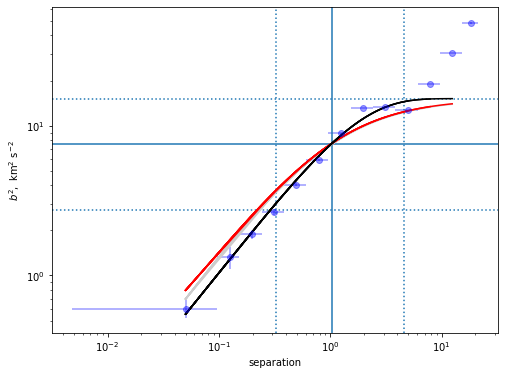

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.4,color="blue")


ax.axhline(sig2, ls='-')
ax.axvline(r0, ls='-')

ax.axhline(2*sig2, ls=':')
ax.axvline(r2, ls=':')

ax.axhline(sig, ls=':')
ax.axvline(r1, ls=':')

ax.plot(rgrid, bfunc00(rgrid, r0, sig2, m), color="0.8")
ax.plot(rgrid, bfunc02(rgrid, r0, sig2, m, VF['s0'], 0.1), color="red")
ax.plot(rgrid, bfunc03s(rgrid, r0, sig2, m, VF['s0'], 0.1), color="black")


ax.set(xscale='log', yscale='log', 
       xlabel='separation',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

sig2, r0, m

In [17]:
table

s                                                                  \
        count         mean         std          min          25%          50%   
ils                                                                             
0       251.0    10.900326    3.780920     0.791245     7.932465    11.499163   
1       372.0    21.036168    2.709417    15.893827    18.645387    21.451589   
2       954.0    33.044031    4.129478    25.145463    29.597278    33.058073   
3      2469.0    52.140708    6.767782    39.843353    46.401618    52.730634   
4      6069.0    82.815377   10.542408    63.128150    73.957440    83.379843   
5     14422.0   130.937223   16.722401   100.000364   116.907110   131.842998   
6     33006.0   207.648275   26.609104   158.493231   185.118746   209.256884   
7     72993.0   328.219949   42.064053   251.190298   292.310211   330.168289   
8    143599.0   516.705886   67.001673   398.107397   459.233767   517.965328   
9    213357.0   804.645033  105.236700   630.958333   713.264281   799.188144   
10   158344.0  1233.145184  161.084783  1000.002065  1093.806425  1207.869628   
11    42922.0  1865.946544  225.094506  1584.899151  1681.144504  1808.231658   
12     2008.0  2732.149358  190.342629  2511.934924  2585.732612  2685.650704   

                                    dV2                                \
             75%          max     count       mean        std     min   
ils                                                                     
0      14.232803    15.763344     251.0   0.601129   1.307489  0.0000   
1      23.524652    25.085167     372.0   1.325784   4.398866  0.0000   
2      36.496511    39.806962     954.0   1.885351   4.024439  0.0000   
3      58.040298    63.080177    2469.0   2.646000   6.213189  0.0000   
4      91.787362    99.995020    6069.0   4.044545   8.023574  0.0000   
5     145.537977   158.486994   14422.0   5.877549   9.513252  0.0000   
6     230.876785   251.186637   33006.0   8.908933  12.589666  0.0000   
7     364.721673   398.106131   72993.0  13.124847  17.006279  0.0000   
8     574.930511   630.954522  143599.0  13.294752  16.981211  0.0000   
9     893.373994   999.997441  213357.0  12.707682  16.134553  0.0000   
10   1356.315470  1584.889519  158344.0  18.953906  24.756854  0.0000   
11   2004.255411  2511.856992   42922.0  30.512920  34.469109  0.0000   
12   2822.325706  3486.292858    2008.0  48.711793  33.331994  0.0004   

                                            
         25%      50%        75%       max  
ils                                         
0     0.0400   0.1849   0.532900    9.9856  
1     0.0676   0.3025   0.869575   62.7264  
2     0.0841   0.4900   1.690000   53.7289  
3     0.1764   0.8836   2.788900  149.5729  
4     0.2601   1.2769   4.708900  182.7904  
5     0.4489   2.1904   7.128900  130.8736  
6     0.7396   3.6100  12.460900  188.7876  
7     1.2321   6.1009  19.272100  166.4100  
8     1.5876   7.0756  18.576100  207.6481  
9     1.5625   6.7081  17.724100  196.8409  
10    1.9600   8.9401  26.010000  229.2196  
11    4.2849  17.6400  45.427600  268.6321  
12   20.7936  47.1969  71.571600  181.7104

In [18]:
M8 = { 'VF' : data,
        'SF' : table,
        's' : s,
        'b2' : b2,
        'sig2' : sig2,
        'pc' : VF['pc'],
        'r0' : r0,
        'r1' : r1,
        'r2' : r2,
        's0' : VF['s0'],
        'm' : m}

In [19]:
f = open('Sfresults\\'+ line + '.pkl',"wb")
pickle.dump(M8,f)
f.close()

class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

jsonfilename = f'SFresults//' + line +'.json'
with open(jsonfilename, "w") as f:
    json.dump(Car, fp=f, indent=3, cls=MyEncoder)
print(jsonfilename, end="")

In [20]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 7.529198169708252 seconds ---
